# Name : Asad ullah
# Batch : DS2312

**Business Use Case**


There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.



**Project Description**


Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


**About The Dataset**
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.


2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 


**Dataset Attributes**


Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)
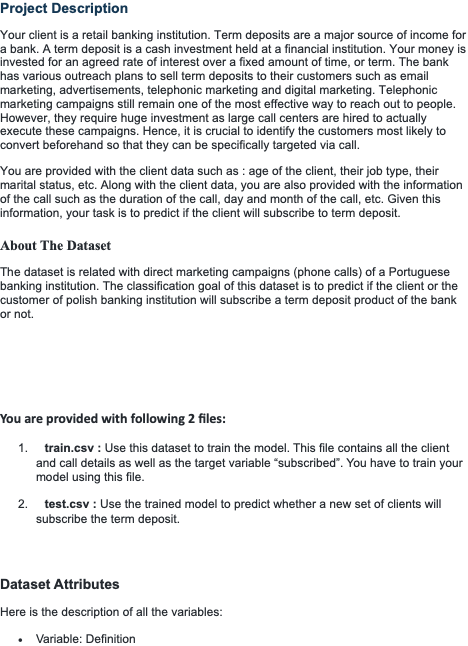


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('termdeposit_train.csv')
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [6]:
df=df.drop('ID',axis=True)

In [5]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [7]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


# Exploratory Data Analysis

In [9]:
df.shape

(31647, 17)

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [11]:
df.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [13]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [15]:
#Checking the values of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64


job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64


marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64


education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64


default
no     31062
yes      585
Name: count, dtype: int64


balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: count, Length: 6326, dtype: int64


housing
yes    17584
no     14063
Name: count, dtype: int6

In [16]:
#Separating numericals and categorical columns
categorical_col= []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")


#Checking for Numerical columns
numerical_col= []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)
print("\n")

Categorical Columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


Numerical Columns:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']




In [17]:
#Checking number of unique values in each column
df.nunique().to_frame("No of unique Values")

,No of unique Values
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3
day,31


In [19]:
df['subscribed'].unique()

array(['no', 'yes'], dtype=object)

# Description of Dataset 

In [22]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Univariate Analysis

subscribed
no     27932
yes     3715
Name: count, dtype: int64


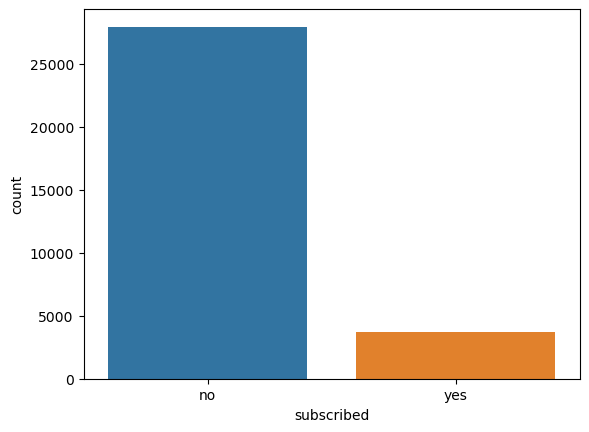

In [24]:
ax= sns.countplot(x='subscribed', data=df)
print(df['subscribed'].value_counts())

Class imbalance problem we will deal that

job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64


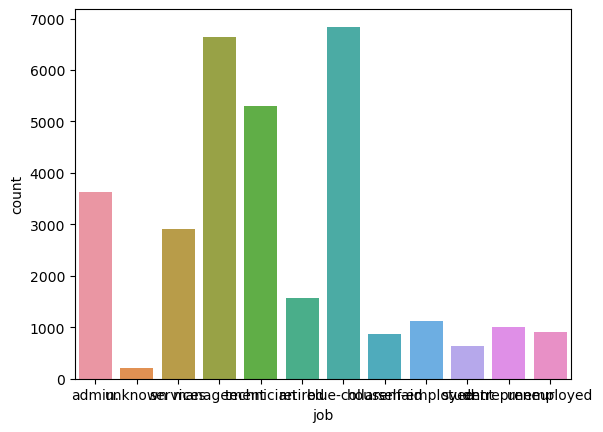

In [25]:
ax= sns.countplot(x='job', data=df)
print(df['job'].value_counts())

marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64


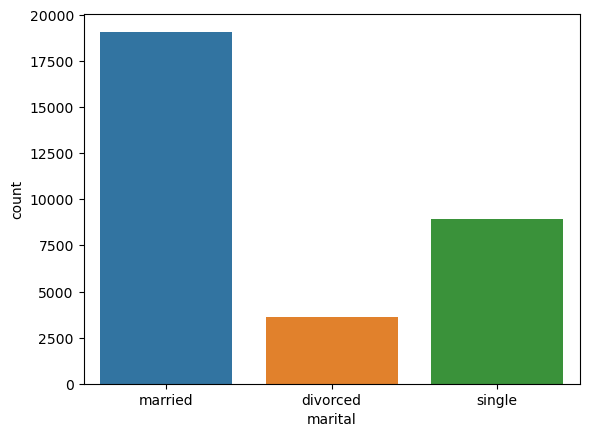

In [27]:
ax= sns.countplot(x='marital', data=df)
print(df['marital'].value_counts())

default
no     31062
yes      585
Name: count, dtype: int64


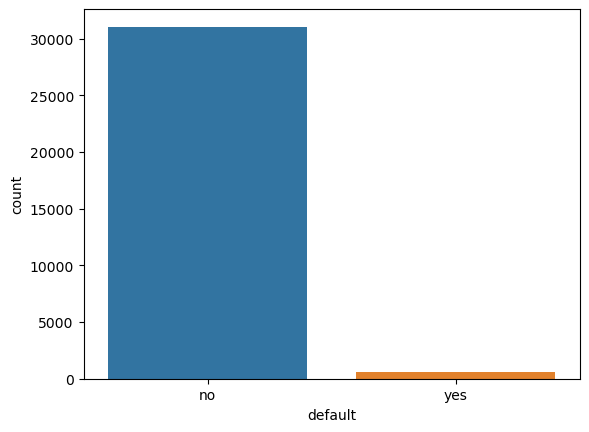

In [28]:
ax= sns.countplot(x='default', data=df)
print(df['default'].value_counts())

balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: count, Length: 6326, dtype: int64


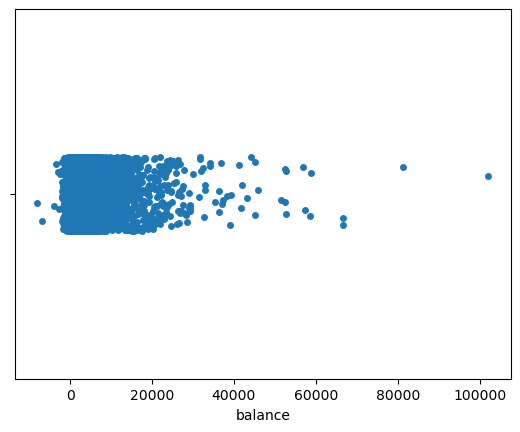

In [31]:
ax= sns.stripplot(x='balance', data=df)
print(df['balance'].value_counts())

housing
yes    17584
no     14063
Name: count, dtype: int64


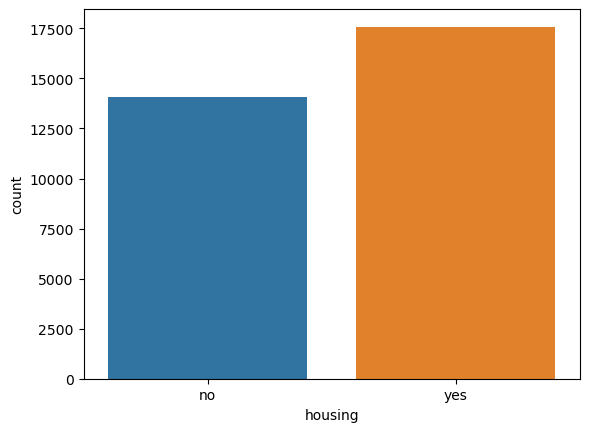

In [32]:
ax= sns.countplot(x='housing', data=df)
print(df['housing'].value_counts())

loan
no     26516
yes     5131
Name: count, dtype: int64


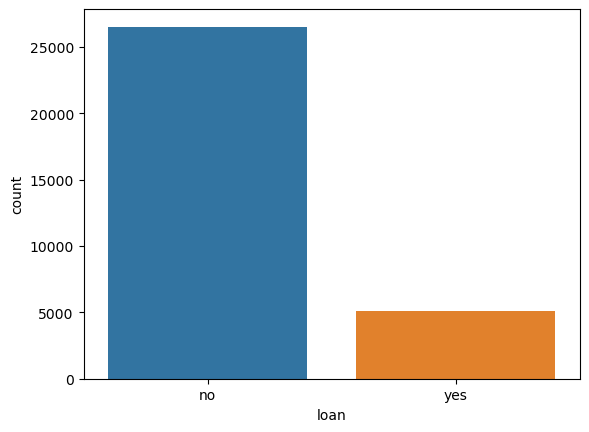

In [33]:
ax= sns.countplot(x='loan', data=df)
print(df['loan'].value_counts())

contact
cellular     20423
unknown       9177
telephone     2047
Name: count, dtype: int64


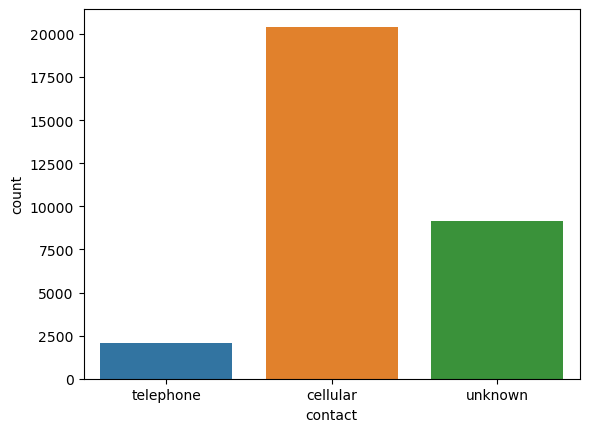

In [34]:
ax= sns.countplot(x='contact', data=df)
print(df['contact'].value_counts())

day
20    1909
18    1612
21    1445
5     1373
6     1348
17    1344
14    1283
8     1281
28    1276
29    1241
7     1240
19    1228
15    1208
12    1116
13    1099
9     1097
30    1082
4     1016
11    1014
16     981
2      900
27     804
3      761
26     761
23     657
22     640
25     586
31     460
10     360
24     305
1      220
Name: count, dtype: int64


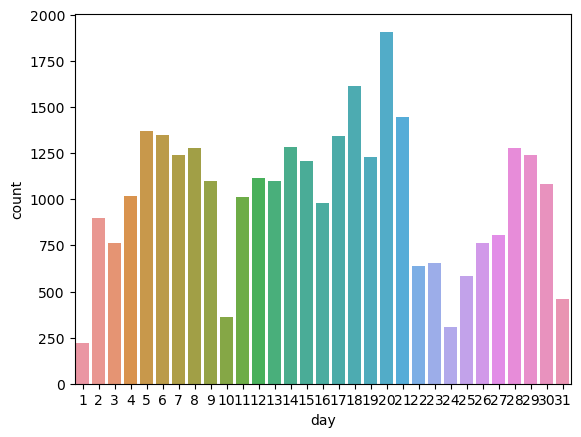

In [35]:
ax= sns.countplot(x='day', data=df)
print(df['day'].value_counts())

month
may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: count, dtype: int64


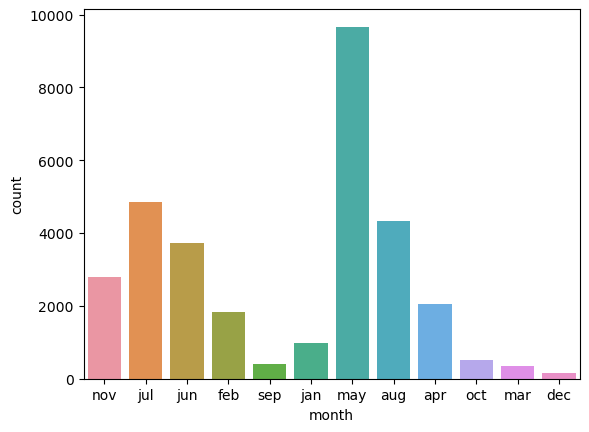

In [36]:
ax= sns.countplot(x='month', data=df)
print(df['month'].value_counts())

# BiVariate Analysis

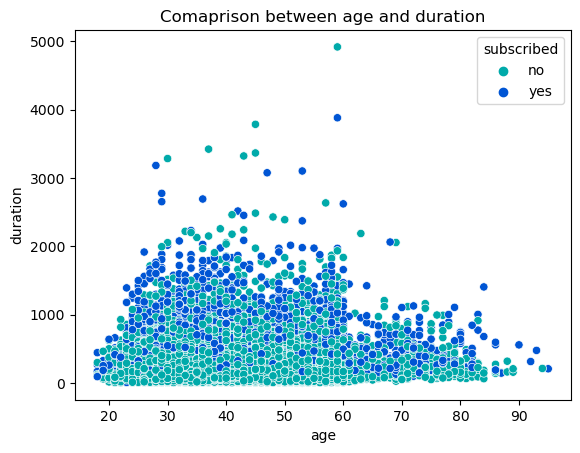

In [57]:
plt.title("Comaprison between age and duration")
sns.scatterplot(x='age', y='duration', data=df, palette= 'winter_r', hue='subscribed')
plt.show()

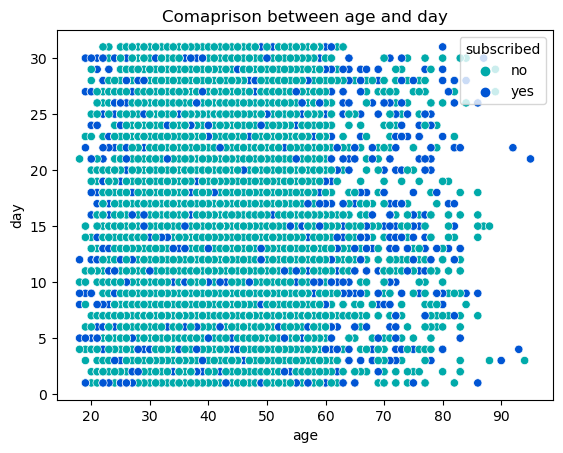

In [59]:
plt.title("Comaprison between age and day")
sns.scatterplot(x='age', y='day', data=df, palette= 'winter_r', hue='subscribed')
plt.show()

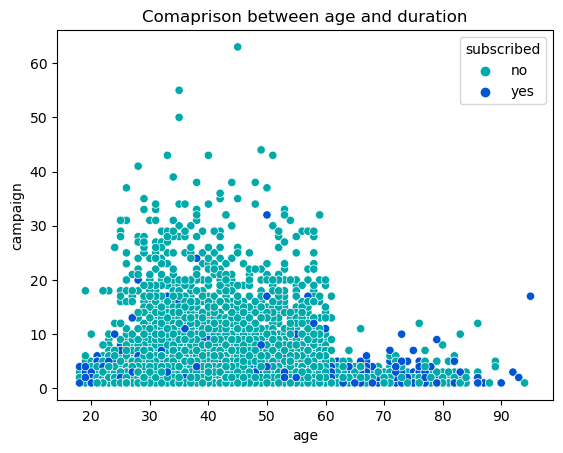

In [61]:
plt.title("Comaprison between age and duration")
sns.scatterplot(x='age', y='campaign', data=df, palette= 'winter_r', hue='subscribed')
plt.show()

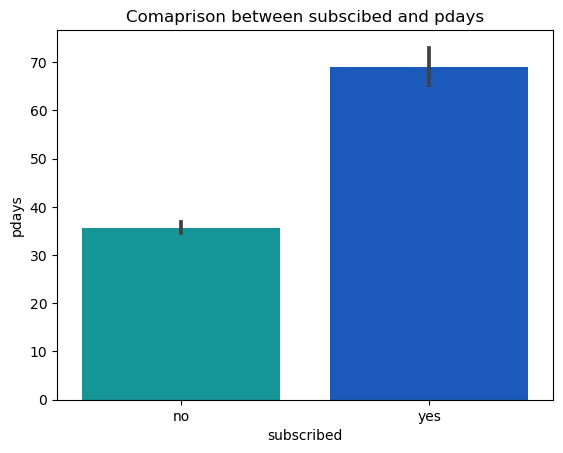

In [67]:
plt.title("Comaprison between subscibed and pdays")
sns.barplot(x='subscribed', y='pdays', data=df, palette= 'winter_r')
plt.show()

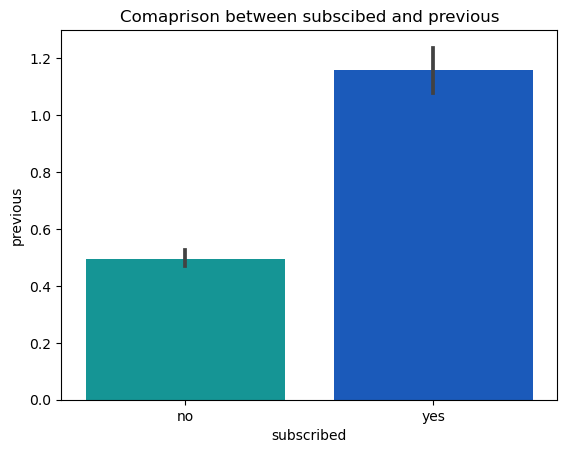

In [68]:
plt.title("Comaprison between subscibed and previous")
sns.barplot(x='subscribed', y='previous', data=df, palette= 'winter_r')
plt.show()

# MultiVariate Analysis

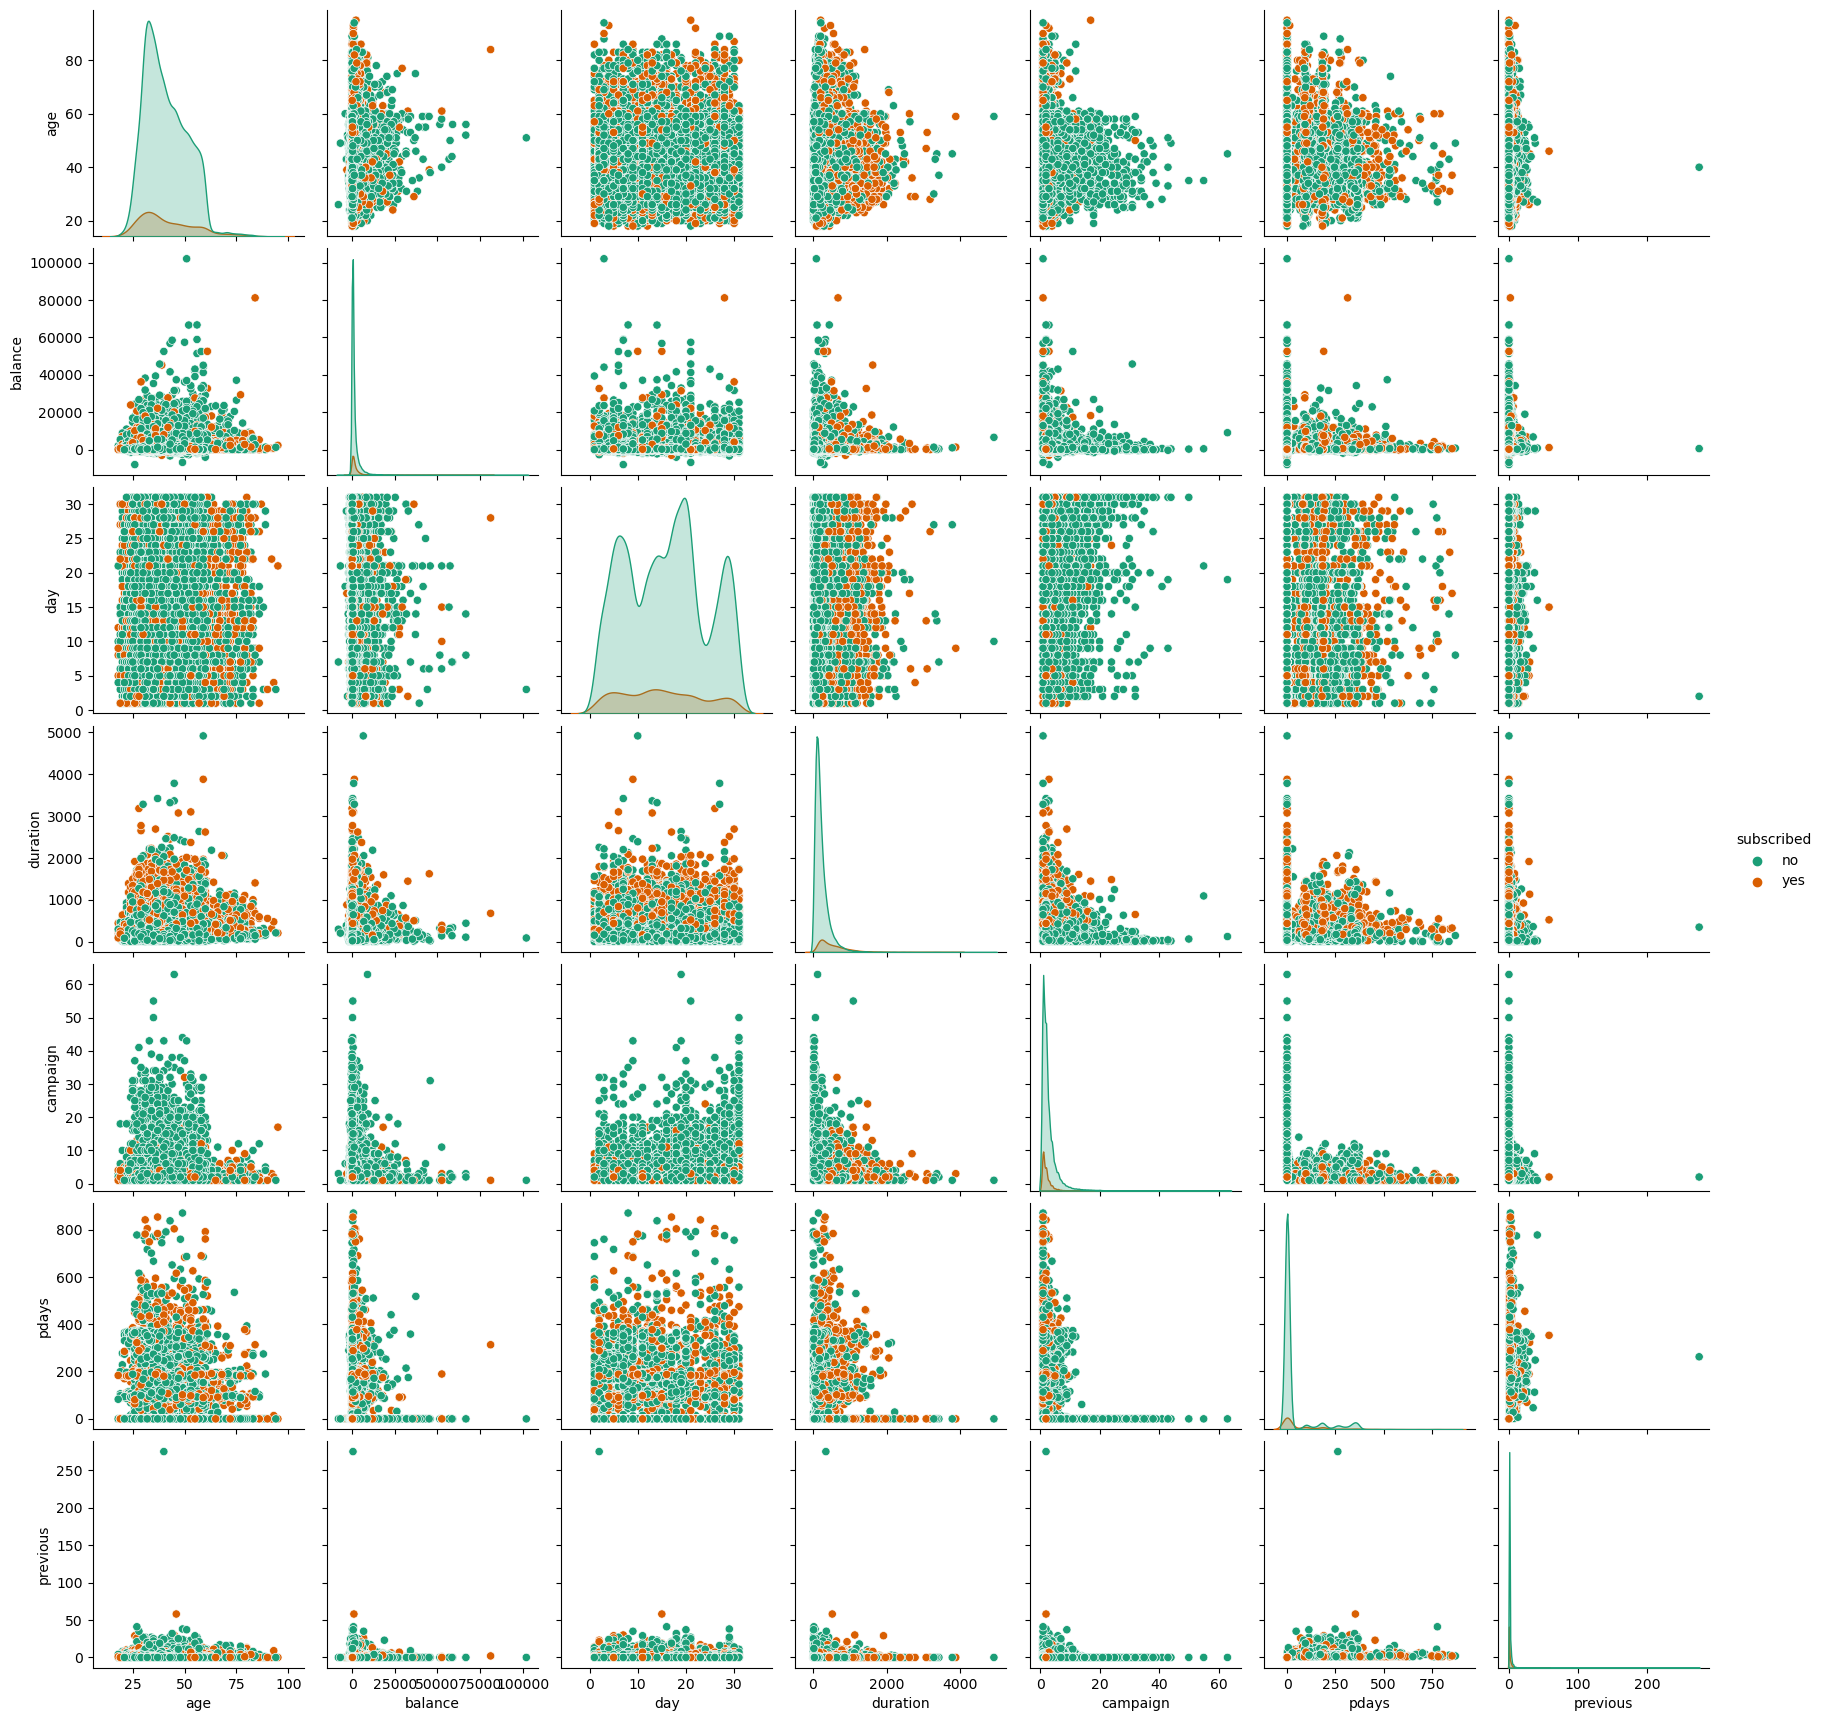

In [77]:
sns.pairplot(df,hue='subscribed', palette='Dark2')
plt.show()

# Check Skewness of data

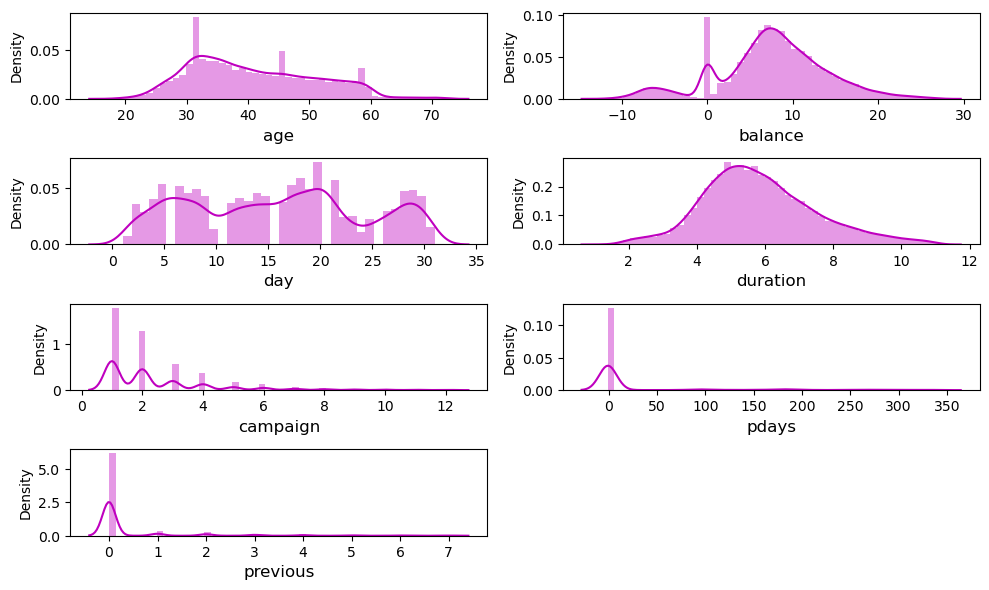

In [121]:
plt.figure(figsize=(10,6), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=7:
        ax= plt.subplot(4,2, plotnumber)
        sns.distplot(df[col], color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [101]:
df['balance'] = np.cbrt(df['balance'])
df['duration']= np.cbrt(df['duration'])

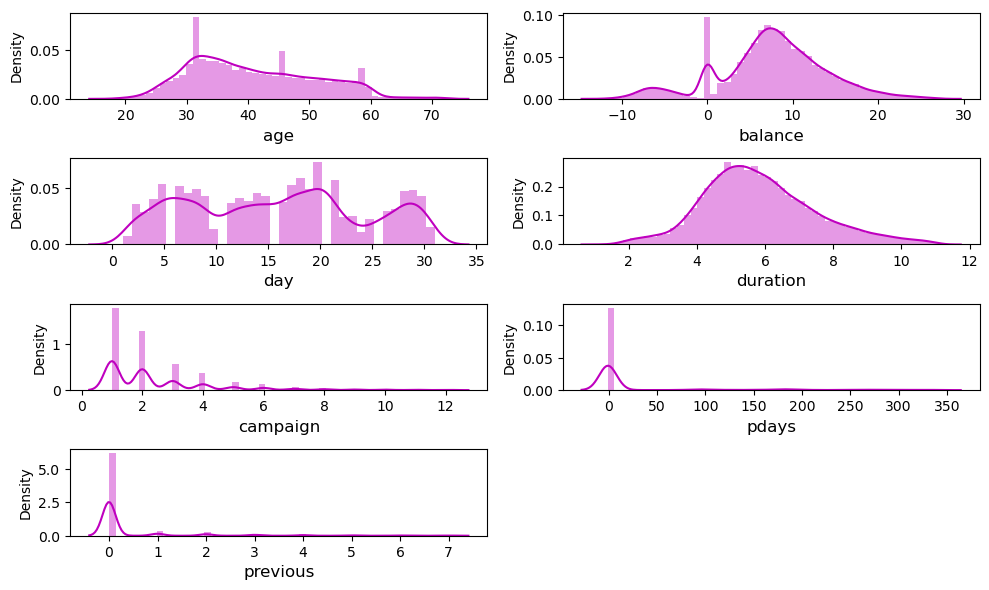

In [122]:
plt.figure(figsize=(10,6), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=7:
        ax= plt.subplot(4,2, plotnumber)
        sns.distplot(df[col], color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

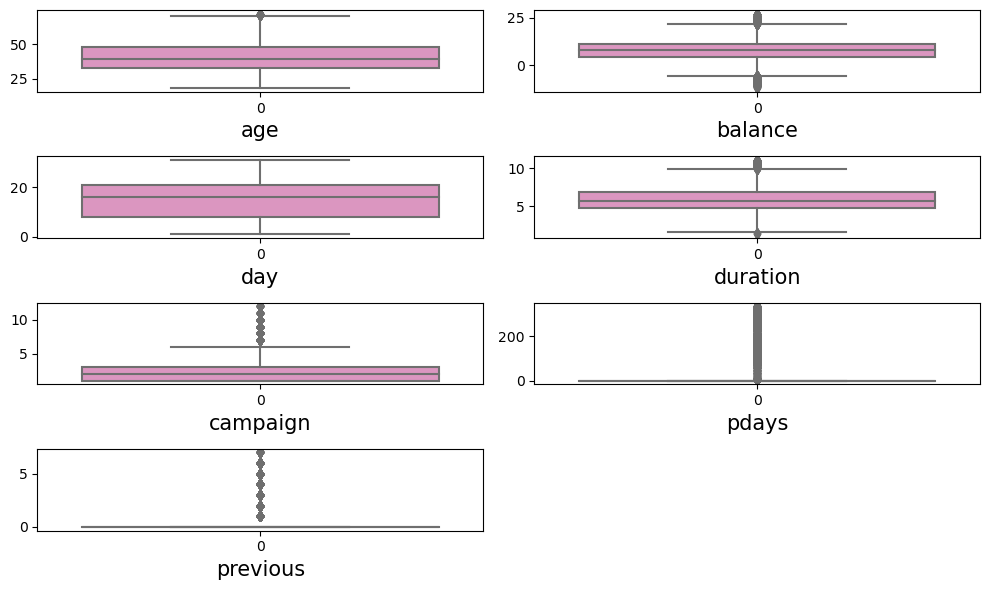

In [124]:
plt.figure(figsize=(10,6), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=7:
        ax= plt.subplot(4,2, plotnumber)
        sns.boxplot(df[col], palette= "Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [118]:
from scipy.stats import zscore
z_score= zscore(df)
abs_z_score = np.abs(z_score)  #Apply formula to get scalled data

filtering_entry= (abs_z_score<3).all(axis=1) # we want 3 scaler standard so we consider 3

df= df[filtering_entry]

df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,28342.000000,28342.000000,28342.000000,28342.000000,28342.0,28342.000000,28342.00000,28342.000000,28342.000000,28342.000000,28342.000000,28342.000000,28342.000000,28342.000000,28342.000000,28342.000000,28342.000000
mean,40.701080,4.349587,1.169325,1.229941,0.0,7.562333,0.55042,0.160892,0.667984,15.842001,5.494178,5.839939,2.453179,24.782337,0.352375,2.665444,0.109908
std,10.114596,3.281519,0.604268,0.747187,0.0,6.302947,0.49746,0.367438,0.911444,8.372634,2.996891,1.648305,1.932612,70.623436,1.056130,0.878685,0.312780
min,18.000000,0.000000,0.000000,0.000000,0.0,-12.284851,0.00000,0.000000,0.000000,1.000000,0.000000,1.259921,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.0,4.396830,0.00000,0.000000,0.000000,8.000000,3.000000,4.717694,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.0,7.763936,1.00000,0.000000,0.000000,16.000000,6.000000,5.646216,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.0,11.318512,1.00000,0.000000,2.000000,21.000000,8.000000,6.811285,3.000000,-1.000000,0.000000,3.000000,0.000000
max,72.000000,11.000000,2.000000,3.000000,0.0,27.228513,1.00000,1.000000,2.000000,31.000000,11.000000,11.106405,12.000000,337.000000,7.000000,3.000000,1.000000


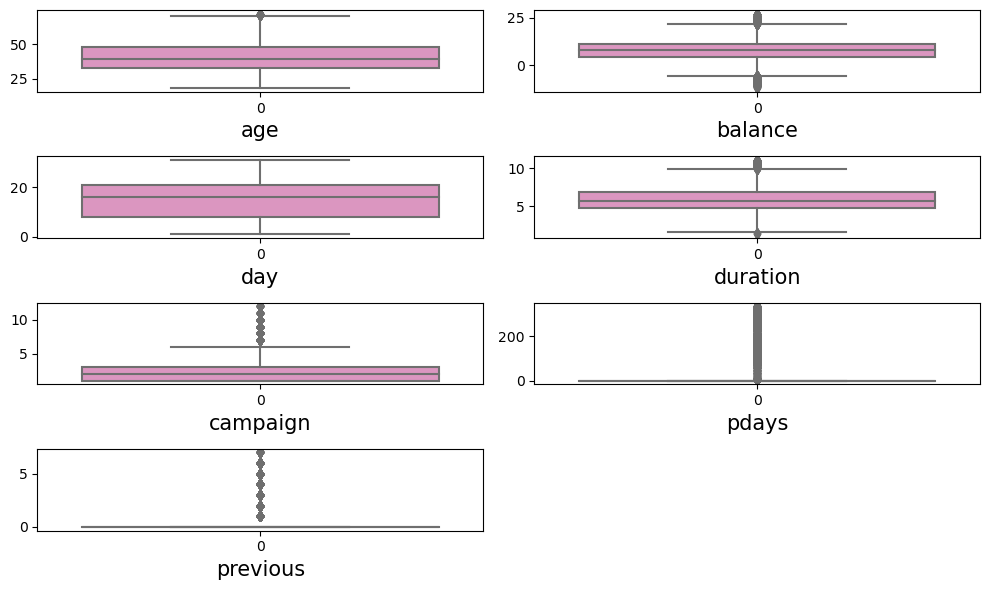

In [125]:
plt.figure(figsize=(10,6), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=7:
        ax= plt.subplot(4,2, plotnumber)
        sns.boxplot(df[col], palette= "Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

# Encoding Categorical Columns

In [104]:
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,12.456918,0.0,0.0,1.0,19,9.0,3.530348,2,-1,0,3.0,0.0
1,31,11.0,1.0,1.0,0.0,1.442250,0.0,0.0,0.0,20,5.0,4.497941,2,-1,0,3.0,0.0
2,27,7.0,1.0,1.0,0.0,9.622603,1.0,0.0,0.0,18,5.0,6.214465,1,-1,0,3.0,0.0
3,57,4.0,0.0,2.0,0.0,14.868480,0.0,0.0,0.0,22,6.0,9.535417,1,84,3,2.0,1.0
4,31,9.0,1.0,1.0,0.0,4.918685,1.0,0.0,0.0,4,3.0,7.243156,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0.0,0.000000,1.0,0.0,0.0,12,8.0,4.876999,2,-1,0,3.0,0.0
31643,53,4.0,0.0,2.0,0.0,7.243156,0.0,1.0,0.0,5,6.0,7.594363,2,-1,0,3.0,1.0
31644,32,4.0,2.0,2.0,0.0,6.782423,0.0,0.0,0.0,7,1.0,3.332222,3,-1,0,3.0,0.0
31645,57,9.0,1.0,1.0,0.0,6.082202,1.0,0.0,1.0,15,8.0,2.802039,7,337,12,0.0,0.0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         31647 non-null  int64  
 1   job         31647 non-null  float64
 2   marital     31647 non-null  float64
 3   education   31647 non-null  float64
 4   default     31647 non-null  float64
 5   balance     31647 non-null  float64
 6   housing     31647 non-null  float64
 7   loan        31647 non-null  float64
 8   contact     31647 non-null  float64
 9   day         31647 non-null  int64  
 10  month       31647 non-null  float64
 11  duration    31647 non-null  float64
 12  campaign    31647 non-null  int64  
 13  pdays       31647 non-null  int64  
 14  previous    31647 non-null  int64  
 15  poutcome    31647 non-null  float64
 16  subscribed  31647 non-null  float64
dtypes: float64(12), int64(5)
memory usage: 4.1 MB


In [106]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,7.456890,0.555629,0.162132,0.644642,15.835466,5.533131,5.855894,2.765697,39.576042,0.574272,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,6.598377,0.496904,0.368578,0.899480,8.337097,3.004247,1.750566,3.113830,99.317592,2.422529,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-20.015821,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,4.179339,0.000000,0.000000,0.000000,8.000000,3.000000,4.702669,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,7.663094,1.000000,0.000000,0.000000,16.000000,6.000000,5.646216,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,11.268857,1.000000,0.000000,2.000000,21.000000,8.000000,6.829198,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,46.742671,1.000000,1.000000,2.000000,31.000000,11.000000,17.005765,63.000000,871.000000,275.000000,3.000000,1.000000


In [85]:
cor= df.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.032288,0.159168,-0.087626,-0.048752,0.077586,-0.029600


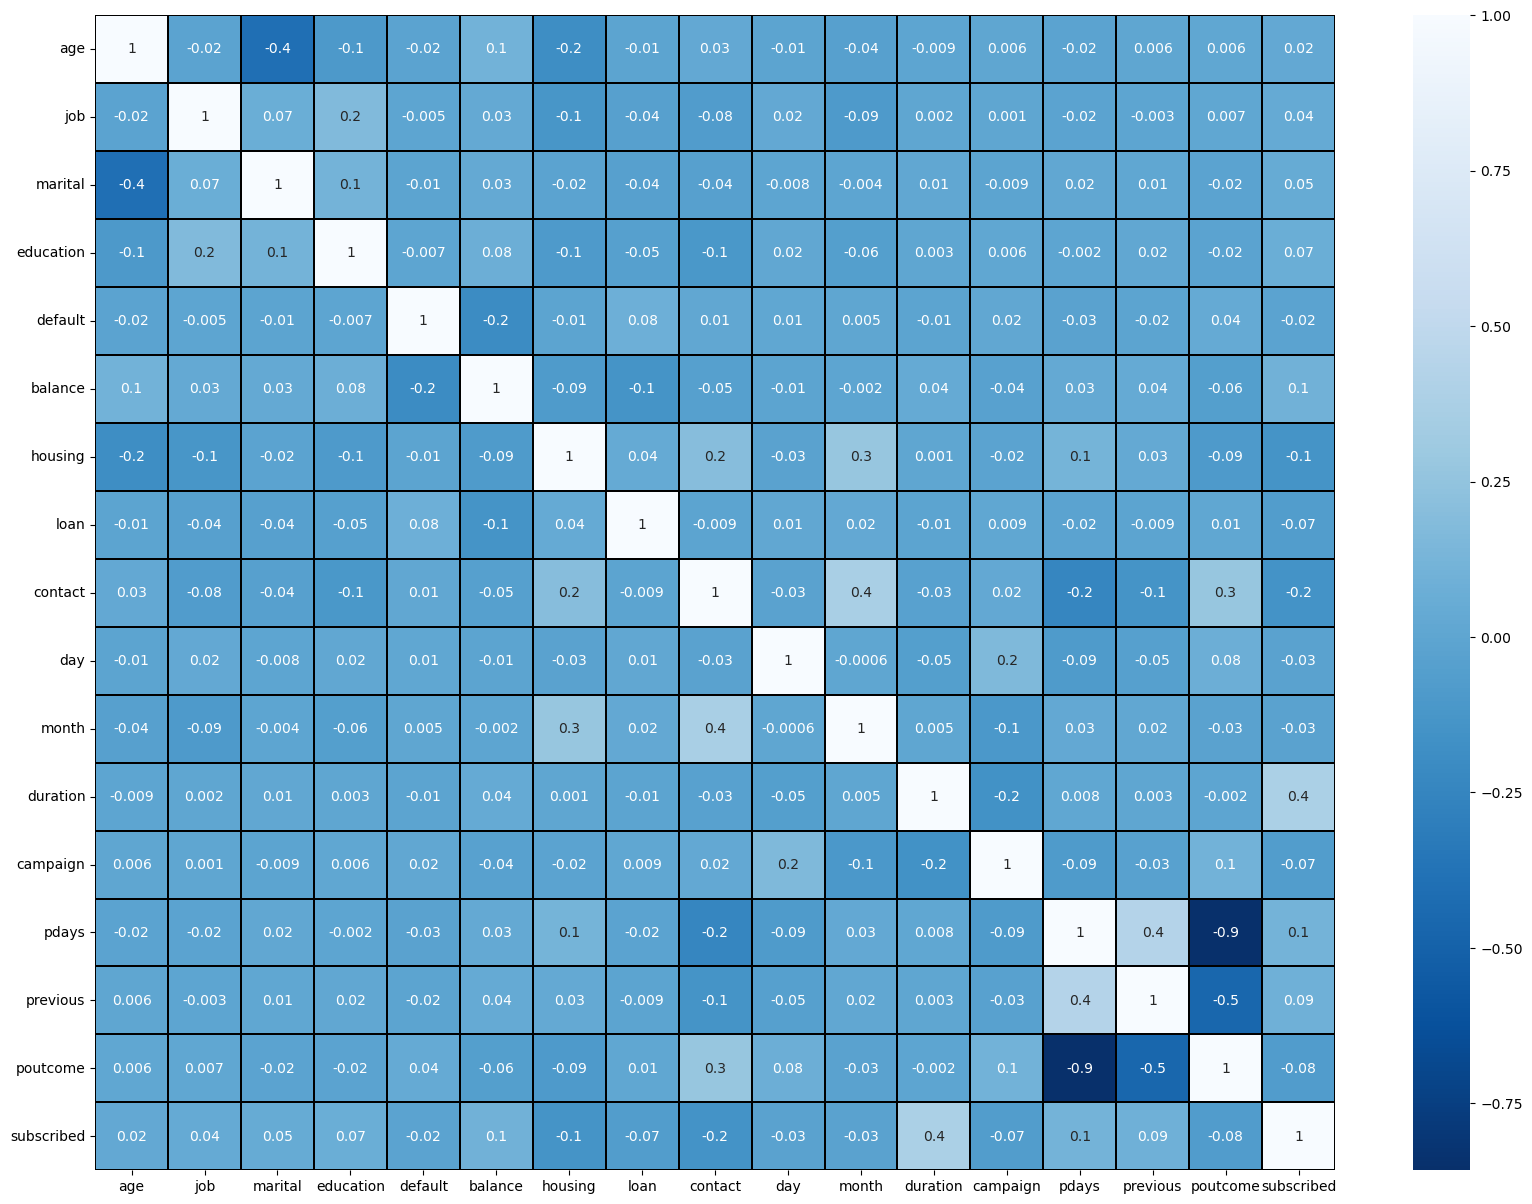

In [107]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor='black', annot=True, cmap= "Blues_r")
plt.yticks(rotation=0);
plt.show()

# Visualize corelation by bar plot

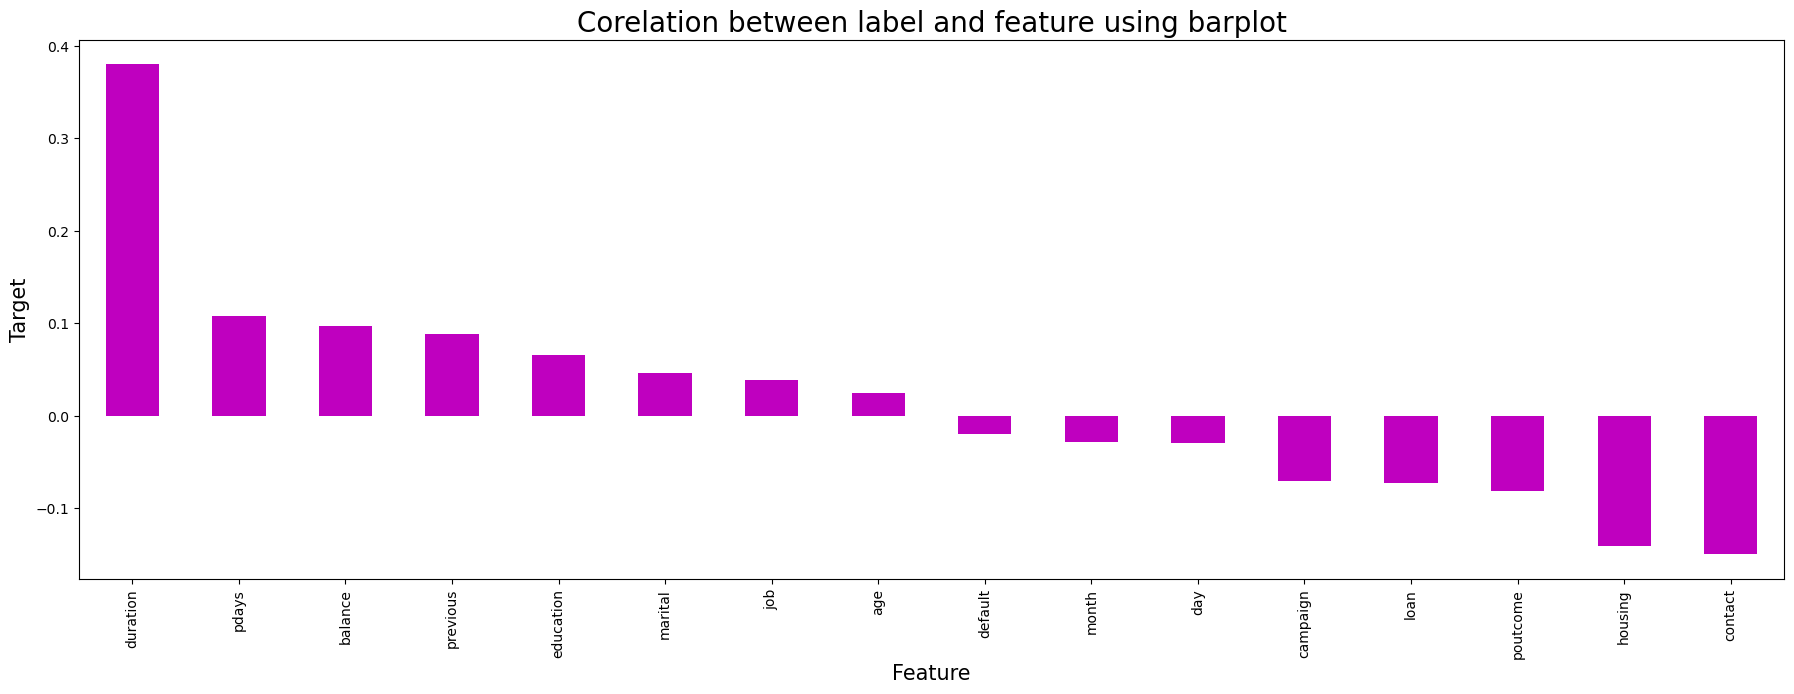

In [108]:
plt.figure(figsize=(22,7))
df.corr()['subscribed'].sort_values(ascending=False).drop(['subscribed']).plot(kind='bar', color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title("Corelation between label and feature using barplot", fontsize=20)
plt.show()

In [109]:
cor['subscribed'].sort_values(ascending=False)

subscribed    1.000000
duration      0.389838
pdays         0.108290
previous      0.088081
education     0.066051
balance       0.050807
marital       0.046043
job           0.038921
age           0.024538
default      -0.020168
month        -0.028088
day          -0.029600
campaign     -0.070607
loan         -0.072266
poutcome     -0.080895
housing      -0.141092
contact      -0.150051
Name: subscribed, dtype: float64

# Separating label and feature

In [110]:
x= df.drop("subscribed", axis=1)
y= df["subscribed"]


In [111]:

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns= x.columns)
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.415793,-1.324317,-0.275405,2.369229,-0.137234,0.757778,-1.118201,-0.439893,0.395076,0.379579,1.154007,-1.328474,-0.245906,-0.408555,-0.237059,0.441777
1,-0.937156,2.037729,-0.275405,-0.300345,-0.137234,-0.911548,-1.118201,-0.439893,-0.716695,0.499526,-0.177462,-0.775734,-0.245906,-0.408555,-0.237059,0.441777
2,-1.313627,0.815167,-0.275405,-0.300345,-0.137234,0.328224,0.894294,-0.439893,-0.716695,0.259631,-0.177462,0.204835,-0.567059,-0.408555,-0.237059,0.441777
3,1.509911,-0.101755,-1.922374,1.034442,-0.137234,1.123262,-1.118201,-0.439893,-0.716695,0.739422,0.155405,2.101938,-0.567059,0.447299,1.001336,-0.576498
4,-0.937156,1.426448,-0.275405,-0.300345,-0.137234,-0.384677,0.894294,-0.439893,-0.716695,-1.419637,-0.843197,0.792477,-0.567059,-0.408555,-0.237059,0.441777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-1.125392,-0.101755,1.371563,1.034442,-0.137234,-1.130128,0.894294,-0.439893,-0.716695,-0.460055,0.821140,-0.559197,-0.245906,-0.408555,-0.237059,0.441777
31643,1.133439,-0.101755,-1.922374,1.034442,-0.137234,-0.032392,-1.118201,2.273280,-0.716695,-1.299690,0.155405,0.993105,-0.245906,-0.408555,-0.237059,0.441777
31644,-0.843038,-0.101755,1.371563,1.034442,-0.137234,-0.102219,-1.118201,-0.439893,-0.716695,-1.059794,-1.508931,-1.441655,0.075247,-0.408555,-0.237059,0.441777
31645,1.509911,1.426448,-0.275405,-0.300345,-0.137234,-0.208341,0.894294,-0.439893,0.395076,-0.100212,0.821140,-1.744523,1.359859,2.994723,4.716521,-2.613048


# Checking Variance Inflation

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.284724,age
1,1.050511,job
2,1.224960,marital
3,1.067739,education
4,1.045985,default
5,1.092456,balance
6,1.193298,housing
7,1.030513,loan
8,1.322754,contact
9,1.038412,day


In [113]:
#Dropping the poutcome column
x.drop("poutcome", axis=1, inplace=True)

In [146]:
vif= pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,1.415793,-1.324317,-0.275405,2.369229,-0.137234,0.757778,-1.118201,-0.439893,0.395076,0.379579,1.154007,-1.328474,-0.245906,-0.408555,-0.237059
1,-0.937156,2.037729,-0.275405,-0.300345,-0.137234,-0.911548,-1.118201,-0.439893,-0.716695,0.499526,-0.177462,-0.775734,-0.245906,-0.408555,-0.237059
2,-1.313627,0.815167,-0.275405,-0.300345,-0.137234,0.328224,0.894294,-0.439893,-0.716695,0.259631,-0.177462,0.204835,-0.567059,-0.408555,-0.237059
3,1.509911,-0.101755,-1.922374,1.034442,-0.137234,1.123262,-1.118201,-0.439893,-0.716695,0.739422,0.155405,2.101938,-0.567059,0.447299,1.001336
4,-0.937156,1.426448,-0.275405,-0.300345,-0.137234,-0.384677,0.894294,-0.439893,-0.716695,-1.419637,-0.843197,0.792477,-0.567059,-0.408555,-0.237059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-1.125392,-0.101755,1.371563,1.034442,-0.137234,-1.130128,0.894294,-0.439893,-0.716695,-0.460055,0.821140,-0.559197,-0.245906,-0.408555,-0.237059
31643,1.133439,-0.101755,-1.922374,1.034442,-0.137234,-0.032392,-1.118201,2.273280,-0.716695,-1.299690,0.155405,0.993105,-0.245906,-0.408555,-0.237059
31644,-0.843038,-0.101755,1.371563,1.034442,-0.137234,-0.102219,-1.118201,-0.439893,-0.716695,-1.059794,-1.508931,-1.441655,0.075247,-0.408555,-0.237059
31645,1.509911,1.426448,-0.275405,-0.300345,-0.137234,-0.208341,0.894294,-0.439893,0.395076,-0.100212,0.821140,-1.744523,1.359859,2.994723,4.716521


In [115]:
y.value_counts()

subscribed
0.0    27932
1.0     3715
Name: count, dtype: int64

In [116]:
from imblearn.over_sampling import SMOTE
SM= SMOTE()
x1,y1= SM.fit_resample(x,y)

In [117]:
y1.value_counts()

subscribed
0.0    27932
1.0    27932
Name: count, dtype: int64

In [128]:
df_test= pd.read_csv('termdeposit_test.csv')
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [138]:
df_test= df_test.drop('ID', axis=1)
df_test = df_test.drop('poutcome', axis=1)

In [139]:
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0
1,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0
2,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0
3,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0
4,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0
13560,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0
13561,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0
13562,29,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,9.0,208,2,91,3


In [140]:
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df_test.columns:
    if df_test[i].dtypes=='object':
        df_test[i]= OE.fit_transform(df_test[i].values.reshape(-1,1))
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0
1,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0
2,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0
3,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0
4,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0
13560,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0
13561,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0
13562,29,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,9.0,208,2,91,3


In [150]:
x_test= df.drop("subscribed", axis=1)
y_test= df["subscribed"]
x_test.drop("poutcome", axis=1, inplace=True)

# Model Building

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RFR= RandomForestClassifier()
RFR.fit(x1, y1)

  


RandomForestClassifier()

In [167]:
pred= RFR.predict(x_test)
acc= accuracy_score(y_test, pred)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

1.0
[[8427    0]
 [   0 8333]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8427
         1.0       1.00      1.00      1.00      8333

    accuracy                           1.00     16760
   macro avg       1.00      1.00      1.00     16760
weighted avg       1.00      1.00      1.00     16760



In [161]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

**Logistic Regression**

In [164]:
LR= LogisticRegression()
LR.fit(x1, y1)
predLR= LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.8158114558472553
[[6736 1691]
 [1396 6937]]
              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81      8427
         1.0       0.80      0.83      0.82      8333

    accuracy                           0.82     16760
   macro avg       0.82      0.82      0.82     16760
weighted avg       0.82      0.82      0.82     16760



**Gradient Boosting classifier**

In [168]:
GB= GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB= GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.9125894988066826
[[7539  888]
 [ 577 7756]]
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91      8427
         1.0       0.90      0.93      0.91      8333

    accuracy                           0.91     16760
   macro avg       0.91      0.91      0.91     16760
weighted avg       0.91      0.91      0.91     16760



**AdaBoost**

In [169]:
AB= AdaBoostClassifier()
AB.fit(x_train, y_train)
predAB= AB.predict(x_test)
print(accuracy_score(y_test, predAB))
print(confusion_matrix(y_test, predAB))
print(classification_report(y_test, predAB))

0.8801909307875895
[[7401 1026]
 [ 982 7351]]
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      8427
         1.0       0.88      0.88      0.88      8333

    accuracy                           0.88     16760
   macro avg       0.88      0.88      0.88     16760
weighted avg       0.88      0.88      0.88     16760



**Extra tree Classifier**

In [170]:
ET= ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET= ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.9592482100238664
[[7852  575]
 [ 108 8225]]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96      8427
         1.0       0.93      0.99      0.96      8333

    accuracy                           0.96     16760
   macro avg       0.96      0.96      0.96     16760
weighted avg       0.96      0.96      0.96     16760



**Cross Validation score**

In [171]:
from sklearn.model_selection import cross_val_score

In [179]:
#Checking for cross validation score for Random Forest
score= cross_val_score(RF, x_test,y_test)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predRF)-score.mean())


[0.89734181 0.95945583 0.9575763  0.9577553  0.95426065]
<built-in method mean of numpy.ndarray object at 0x143d77150>
Difference between Accuracy score and Cross validation score 0.05472202164769302


In [180]:
#Checking for cross validation score for Logistic Regression
score= cross_val_score(LR, x_test,y_test)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predLR)-score.mean())


[0.79713604 0.81264916 0.82488067 0.82488067 0.8201074 ]
<built-in method mean of numpy.ndarray object at 0x13aa798f0>
Difference between Accuracy score and Cross validation score -0.0001193317422435447


In [181]:
#Checking for cross validation score for Gradient Boosting
score= cross_val_score(GB, x_test,y_test)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predGB)-score.mean())


[0.90005967 0.90513126 0.91139618 0.91646778 0.9176611 ]
<built-in method mean of numpy.ndarray object at 0x143de9290>
Difference between Accuracy score and Cross validation score 0.0024463007159903905


In [182]:
#Checking for cross validation score for Ada Boost
score= cross_val_score(AB, x_test,y_test)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predAB)-score.mean())


[0.87678998 0.86694511 0.89170644 0.89588305 0.88902148]
<built-in method mean of numpy.ndarray object at 0x143d9a2b0>
Difference between Accuracy score and Cross validation score -0.0038782816229117056


In [183]:
# Checking for cross validation score for Extra tree
score= cross_val_score(ET, x_test,y_test)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predET)-score.mean())


[0.92422434 0.93257757 0.93108592 0.94063246 0.92810263]
<built-in method mean of numpy.ndarray object at 0x143d75050>
Difference between Accuracy score and Cross validation score 0.02792362768496426


# Hyper Paramter Tunning

In [184]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']  # Regularization type
}

In [188]:
GCV= GridSearchCV(LR,param_grid, cv=5)

In [189]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [190]:
GCV.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [195]:
# Evaluate the model with the best parameters
best_model = GCV.best_estimator_
accuracy = best_model.score(x_test, y_test)


In [196]:
print("Best parameters:", GCV.best_params_)
print("Accuracy:", accuracy)


Best parameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.8159307875894988
